In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clients = pd.read_csv("client.csv", index_col=0)
invoices = pd.read_csv("invoice.csv", index_col=0)

## Data Exploration

In [3]:
clients.head()

,region,date,dis,id,catg,target
0,101,31/12/94,60,train_Client_0,11,0
1,107,29/05/02,69,train_Client_1,11,0
2,301,13/03/86,62,train_Client_10,11,0
3,105,11/07/96,69,train_Client_100,11,0
4,303,14/10/14,62,train_Client_1000,11,0


In [4]:
clients['target'].value_counts()

0    127927
1      7566
Name: target, dtype: int64

<BarContainer object of 2 artists>

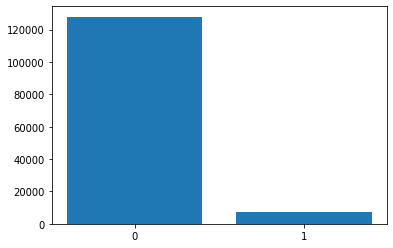

In [ ]:
#Checking distribution counts of fraud and non-fraud
plt.bar([0,1], clients['target'].value_counts(), tick_label=[0,1])

In [ ]:
clients['catg'].value_counts()

11    131494
12      2321
51      1678
Name: catg, dtype: int64

In [ ]:
invoices.head()

,id,date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,consommation_level_4,old_index,new_index,months_number,counter_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3
0,train_Client_0,24/03/14,11,1335667.0,0,203,8,0,14302,14384,4,ELEC,1,82,0,0
1,train_Client_0,29/03/13,11,1335667.0,0,203,6,0,12294,13678,4,ELEC,1,1200,184,0
2,train_Client_0,23/03/15,11,1335667.0,0,203,8,0,14624,14747,4,ELEC,1,123,0,0
3,train_Client_0,13/07/15,11,1335667.0,0,207,8,0,14747,14849,4,ELEC,1,102,0,0
4,train_Client_0,17/11/16,11,1335667.0,0,207,9,0,15066,15638,12,ELEC,1,572,0,0


In [ ]:
#number of unique ids in invoice dataset
invoices['id'].nunique()

31603

In [ ]:
#number of unique ids in clients dataset
clients['id'].nunique()

135493

In [ ]:
#Since unique ids in invoices < unique ids in clients -> Some clients don't have invoices??

In [ ]:
invoices.describe()

,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,consommation_level_4,old_index,new_index,months_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.013626e+01,1.209200e+11,4.203419e-02,1.722212e+02,7.315270e+00,5.405997e+01,1.780314e+04,1.838809e+04,4.632200e+01,1.000236e+00,4.097446e+02,1.075682e+02,2.041343e+01
std,1.348246e+01,1.646702e+12,3.745414e-01,1.335823e+02,1.359625e+00,9.792183e+02,4.062121e+04,4.122851e+04,2.594754e+03,8.306498e-02,5.882746e+02,1.169328e+03,1.636440e+02
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.214730e+05,0.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,1.792000e+03,2.057000e+03,4.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00
50%,1.100000e+01,4.904750e+05,0.000000e+00,2.030000e+02,6.000000e+00,0.000000e+00,7.718000e+03,8.218000e+03,4.000000e+00,1.000000e+00,2.720000e+02,0.000000e+00,0.000000e+00
75%,4.000000e+01,1.112725e+06,0.000000e+00,2.070000e+02,9.000000e+00,0.000000e+00,2.181900e+04,2.252000e+04,4.000000e+00,1.000000e+00,6.010000e+02,0.000000e+00,0.000000e+00
max,4.500000e+01,2.738110e+13,5.000000e+00,6.000000e+02,9.000000e+00,3.435680e+05,2.800280e+06,2.870972e+06,2.944060e+05,5.000000e+01,9.888900e+04,8.198860e+05,4.536000e+04


In [ ]:
#old index is new index of previous transaction

In [ ]:
print(clients.shape)
print(invoices.shape)

(135493, 6)
(1048575, 16)


In [ ]:
clients.columns

Index(['region', 'date', 'dis', 'id', 'catg', 'target'], dtype='object')

In [ ]:
invoices.columns

Index(['id', 'date', 'tarif_type', 'counter_number', 'counter_statue',
       'counter_code', 'reading_remarque', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'counter_coefficient',
       'consommation_level_1', 'consommation_level_2', 'consommation_level_3'],
      dtype='object')

<BarContainer object of 25 artists>

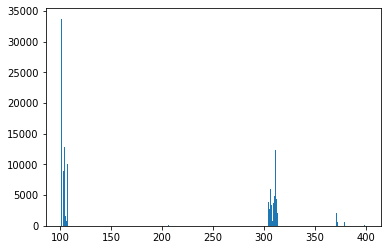

In [ ]:
plt.bar(clients.groupby('region')['id'].count().index, clients.groupby('region')['id'].count().values)

In [ ]:
clients.head()

,region,date,dis,id,catg,target
0,101,31/12/94,60,train_Client_0,11,0
1,107,29/05/02,69,train_Client_1,11,0
2,301,13/03/86,62,train_Client_10,11,0
3,105,11/07/96,69,train_Client_100,11,0
4,303,14/10/14,62,train_Client_1000,11,0


In [ ]:
invoices.head()

,id,date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,consommation_level_4,old_index,new_index,months_number,counter_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3
0,train_Client_0,24/03/14,11,1335667.0,0,203,8,0,14302,14384,4,ELEC,1,82,0,0
1,train_Client_0,29/03/13,11,1335667.0,0,203,6,0,12294,13678,4,ELEC,1,1200,184,0
2,train_Client_0,23/03/15,11,1335667.0,0,203,8,0,14624,14747,4,ELEC,1,123,0,0
3,train_Client_0,13/07/15,11,1335667.0,0,207,8,0,14747,14849,4,ELEC,1,102,0,0
4,train_Client_0,17/11/16,11,1335667.0,0,207,9,0,15066,15638,12,ELEC,1,572,0,0


## Data Preprocessing

In [4]:
#mean is used as it can capture most of the information across multiple rows
agg_invoices = invoices.groupby('id').mean().reset_index()

In [5]:
#id is drop as it is an arbitrary number and does not affect classification
df = clients.drop('date', axis=1).merge(agg_invoices, on='id').drop('id', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'], test_size=0.2, random_state=101, stratify=df['target'])

In [7]:
#initial dimensions and distribution of classes of train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(25282, 16)
(6321, 16)
0    23876
1     1406
Name: target, dtype: int64
0    5970
1     351
Name: target, dtype: int64


In [8]:
#create a Random object so that it only affects whichever other objects uses it
import random
myrandom = random.Random(101)

In [ ]:
#Performing random undersampling

In [9]:
removed_index = myrandom.sample(sorted(y_train[y_train==0].index), 22000) #extracting the index of non-fraud rows that we want to remove from the training dataset
removed_X = X_train.loc[removed_index]
reduced_X = X_train.drop(removed_index)
removed_y = y_train[removed_index]
reduced_y = y_train.drop(removed_index)
new_X_test = pd.concat([X_test,removed_X]) #adding the index of rows that were removed into the test dataset
new_y_test = pd.concat([y_test,removed_y])

In [10]:
#dimensions and distributions of classes after undersampling
print(reduced_X.shape)
print(new_X_test.shape)
print(reduced_y.value_counts())

(3282, 16)
(28321, 16)
0    1876
1    1406
Name: target, dtype: int64


<BarContainer object of 2 artists>

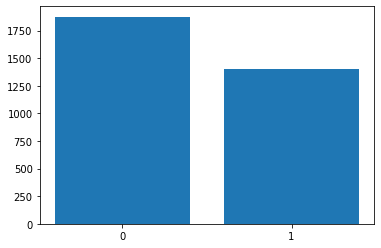

In [11]:
#distribution of classes in training dataset
plt.bar([0,1], reduced_y.value_counts(), tick_label=[0,1])

<BarContainer object of 2 artists>

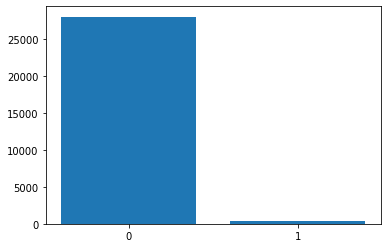

In [ ]:
#distribution of classes in test dataset
plt.bar([0,1], new_y_test.value_counts(), tick_label=[0,1])

In [12]:
#checking the data distribution of each column to check for outliers as well as the magnitude in each column
reduced_X.describe()

,region,dis,catg,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,consommation_level_4,old_index,new_index,months_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3
count,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,205.872334,63.858318,11.895186,17.660954,5.232466e+11,0.059801,198.539753,7.418839,90.415649,16443.935904,17157.390083,51.400351,1.000642,474.961518,135.656023,35.103504
std,104.710998,3.442262,5.858952,6.995605,3.016017e+12,0.219270,96.555122,0.789178,732.801937,28804.467742,29440.520712,2689.877828,0.034962,1264.236000,604.400426,102.080581
min,101.000000,60.000000,11.000000,10.000000,1.000000e+00,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,103.000000,62.000000,11.000000,11.000000,2.927884e+05,0.000000,112.516460,6.888889,0.000000,4224.245718,4687.670261,4.000000,1.000000,240.441026,0.000000,0.000000
50%,107.000000,63.000000,11.000000,13.000000,7.765529e+05,0.000000,203.000000,7.309524,0.000000,10034.922959,10603.454879,4.205128,1.000000,371.438424,15.438339,0.000000
75%,307.000000,69.000000,11.000000,25.320988,3.553384e+06,0.051892,207.000000,7.892184,0.000000,19527.812964,20141.232143,4.628571,1.000000,559.652344,95.447465,17.094535
max,399.000000,69.000000,51.000000,45.000000,2.718110e+13,5.000000,565.000000,9.000000,31605.600000,596399.710145,600196.405797,154104.139535,3.000000,52790.000000,23717.333333,1333.333333


In [12]:
#Use standardization/MinMaxScaler as some cols have outliers such as the consumption_levels
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(reduced_X)
X_test_scaled = minmax_scaler.transform(new_X_test)

## Training and Testing of Models

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 2) #num of neighbors = 2 since we only have fraud or non-fraud classes
knn.fit(X_train_scaled,reduced_y)
knn_pred = knn.predict(X_test_scaled)
print(confusion_matrix(new_y_test, knn_pred))
print(classification_report(new_y_test, knn_pred))

[[23793  4177]
 [  244   107]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     27970
           1       0.02      0.30      0.05       351

    accuracy                           0.84     28321
   macro avg       0.51      0.58      0.48     28321
weighted avg       0.98      0.84      0.90     28321



In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 300)
logr.fit(X_train_scaled,reduced_y)
logr_pred = logr.predict(X_test_scaled)
print(confusion_matrix(new_y_test, logr_pred))
print(classification_report(new_y_test, logr_pred))

[[22419  5551]
 [  243   108]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     27970
           1       0.02      0.31      0.04       351

    accuracy                           0.80     28321
   macro avg       0.50      0.55      0.46     28321
weighted avg       0.98      0.80      0.88     28321



In [16]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled,reduced_y)
svm_pred = svm.predict(X_test_scaled)
print(confusion_matrix(new_y_test, svm_pred))
print(classification_report(new_y_test, svm_pred))

[[21015  6955]
 [  167   184]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.86     27970
           1       0.03      0.52      0.05       351

    accuracy                           0.75     28321
   macro avg       0.51      0.64      0.45     28321
weighted avg       0.98      0.75      0.85     28321



In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled,reduced_y)
rf_pred = rf.predict(X_test_scaled)
print(confusion_matrix(new_y_test, rf_pred))
print(classification_report(new_y_test, rf_pred))

[[22284  5686]
 [  121   230]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     27970
           1       0.04      0.66      0.07       351

    accuracy                           0.79     28321
   macro avg       0.52      0.73      0.48     28321
weighted avg       0.98      0.79      0.87     28321



In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train_scaled,reduced_y)
hgb_pred = hgb.predict(X_test_scaled)
print(confusion_matrix(new_y_test, hgb_pred))
print(classification_report(new_y_test, hgb_pred))

[[22080  5890]
 [  115   236]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     27970
           1       0.04      0.67      0.07       351

    accuracy                           0.79     28321
   macro avg       0.52      0.73      0.48     28321
weighted avg       0.98      0.79      0.87     28321



In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
model = Sequential()
model.add(Input(16))
model.add(Dense(40,  activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=1,activation='softmax'))

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 40)                680       
                                                                 
 dropout_15 (Dropout)        (None, 40)                0         
                                                                 
 dense_21 (Dense)            (None, 40)                1640      
                                                                 
 dropout_16 (Dropout)        (None, 40)                0         
                                                                 
 dense_22 (Dense)            (None, 20)                820       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [57]:
import keras.metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.Recall()])

In [68]:
history = None

epochs = 10
history = model.fit(X_train_scaled, reduced_y, epochs = 25)

Epoch 1/25
103/103 [==============================] - 0s 1ms/step - loss: 0.5812 - recall_2: 1.0000
Epoch 2/25
103/103 [==============================] - 0s 1ms/step - loss: 0.5828 - recall_2: 1.0000
Epoch 3/25
103/103 [==============================] - 0s 1ms/step - loss: 0.5784 - recall_2: 1.0000
Epoch 4/25
103/103 [==============================] - 0s 1ms/step - loss: 0.5822 - recall_2: 1.0000
Epoch 5/25
103/103 [==============================] - 0s 2ms/step - loss: 0.5791 - recall_2: 1.0000
Epoch 6/25
103/103 [==============================] - 0s 2ms/step - loss: 0.5759 - recall_2: 1.0000
Epoch 7/25
103/103 [==============================] - 0s 2ms/step - loss: 0.5749 - recall_2: 1.0000
Epoch 8/25
103/103 [==============================] - 0s 2ms/step - loss: 0.5748 - recall_2: 1.0000
Epoch 9/25
103/103 [==============================] - 0s 1ms/step - loss: 0.5686 - recall_2: 1.0000
Epoch 10/25
103/103 [==============================] - 0s 1ms/step - loss: 0.5707 - recall_2: 1.0000

In [69]:
NN_pred = model.predict(X_test_scaled)

886/886 [==============================] - 1s 841us/step


In [70]:
nn_pred = (NN_pred < 0.5).astype("int").flatten()

In [71]:
print(confusion_matrix(new_y_test, nn_pred))
print(classification_report(new_y_test, nn_pred))

[[27970     0]
 [  351     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27970
           1       0.00      0.00      0.00       351

    accuracy                           0.99     28321
   macro avg       0.49      0.50      0.50     28321
weighted avg       0.98      0.99      0.98     28321



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross Validation

In [21]:

svm_score = []
rf_score = []
hgb_score = []
def manual_cv(n):
    for i in range(n):
        #same process of train test split, then undersampling
        X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                            df['target'], test_size=0.2, random_state=101+i, stratify=df['target'])
        removed_index = myrandom.sample(sorted(y_train[y_train==0].index), 22000)
        removed_X = X_train.loc[removed_index]
        reduced_X = X_train.drop(removed_index)
        removed_y = y_train[removed_index]
        reduced_y = y_train.drop(removed_index)
        new_X_test = pd.concat([X_test,removed_X])
        new_y_test = pd.concat([y_test,removed_y])

        #Standardization of data
        minmax_scaler = MinMaxScaler()
        X_train_scaled = minmax_scaler.fit_transform(reduced_X)
        X_test_scaled = minmax_scaler.transform(new_X_test)

        svm = SVC()
        svm.fit(X_train_scaled,reduced_y)
        svm_pred = svm.predict(X_test_scaled)
        svm_score.append(recall_score(new_y_test, svm_pred))

        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train_scaled,reduced_y)
        rf_pred = rf.predict(X_test_scaled)
        rf_score.append(recall_score(new_y_test, rf_pred))

        hgb = HistGradientBoostingClassifier(random_state=42)
        hgb.fit(X_train_scaled,reduced_y)
        hgb_pred = hgb.predict(X_test_scaled)
        hgb_score.append(recall_score(new_y_test, hgb_pred))

In [22]:
manual_cv(5) #5-fold cross validation

In [53]:
#scores of each model in each run
print(svm_score)
print(rf_score)
print(hgb_score)

[0.4415954415954416, 0.48148148148148145, 0.4586894586894587, 0.47863247863247865, 0.46438746438746437]
[0.6495726495726496, 0.6068376068376068, 0.6153846153846154, 0.6381766381766382, 0.6239316239316239]
[0.6666666666666666, 0.6353276353276354, 0.6866096866096866, 0.6666666666666666, 0.6381766381766382]


## Hyperparameters tuning

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.1,0.12,0.15], 'max_depth':[22,25], 'max_leaf_nodes':[32,35], 'min_samples_leaf':[47,50]}
grid = GridSearchCV(HistGradientBoostingClassifier(), param_grid, verbose = 3, scoring='recall')

In [102]:
#grid.fit(reduced_X, reduced_y)
grid.fit(X_train_scaled, reduced_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=47;, score=0.651 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=47;, score=0.642 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=47;, score=0.630 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=47;, score=0.637 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=47;, score=0.623 total time=   0.5s
[CV 1/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=50;, score=0.662 total time=   0.7s
[CV 2/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=50;, score=0.663 total time=   0.7s
[CV 3/5] END learning_rate=0.1, max_depth=22, max_leaf_nodes=32, min_samples_leaf=50;, score=0.623 total time=  

GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.12, 0.15],
                         'max_depth': [22, 25], 'max_leaf_nodes': [32, 35],
                         'min_samples_leaf': [47, 50]},
             scoring='recall', verbose=3)

In [103]:
grid.best_params_

{'learning_rate': 0.12,
 'max_depth': 22,
 'max_leaf_nodes': 32,
 'min_samples_leaf': 47}

In [100]:
hgb = HistGradientBoostingClassifier(random_state=101, learning_rate=0.12, max_depth=22, max_leaf_nodes = 32, min_samples_leaf = 47)
hgb.fit(X_train_scaled,reduced_y)
hgb_pred = hgb.predict(X_test_scaled)
print(confusion_matrix(new_y_test, hgb_pred))
print(classification_report(new_y_test, hgb_pred))

[[21854  6116]
 [  112   239]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.88     27970
           1       0.04      0.68      0.07       351

    accuracy                           0.78     28321
   macro avg       0.52      0.73      0.47     28321
weighted avg       0.98      0.78      0.87     28321

